<center><h1>NeuroM Tutorial</h1></center>


You can take a look to the online guide here - [NEUROM.](https://developer.humanbrainproject.eu/docs/projects/neurom/0.0.3/readme.html)

The first __IMPORTANT__ thing you should do is:<br>
to download all the files from the folder "morphologies"
in the MOODLE and save them in the Storage of the collab.

First we will go throught the tutorial with one example file.<br>
ENJOY IT!!

In [1]:
# Make sure that all the plots will be shown
%matplotlib inline 

# be sure that all of us use the same neurom version
#!pip install neurom==1.4.5

# import the packages
import pylab as plt
import neurom as nm

In [2]:
# These lines allow us to take and work with the desired files in the storage.
# Let's start with one example called "cell21.CNG.swc"
#collab_path = get_collab_storage_path()
#path_to_neuron = '/tmp/downloaded_exampleCell.CNG.swc'
#clients = get_hbp_service_client()

# download file from the storage to the virtual machine of the collab
#clients.storage.download_file(collab_path + '/exampleCell.CNG.swc', path_to_neuron)

# 1. Load Morphologies & Internal Representation

In [3]:
path_to_neuron = 'data/exampleCell.CNG.swc'

In [4]:
# compatible file formats for morphology could be: ascii, swc, hdf5

neuron = nm.load_neuron(path_to_neuron)
print neuron.name

exampleCell.CNG


No handlers could be found for logger "neurom.core._soma"


A morphology object consists of:
* Soma
* Neurites (basal dendrites, axon, apical dendrites)
* Sections

In [5]:
# A soma is represented as a set of points (x, y, z, radius)

print "Soma Points: \n", neuron.soma.points
print "Soma Center: \n", neuron.soma.center
print "Soma Radius: \n", neuron.soma.radius

Soma Points: 
[[  0.      0.      0.     10.809]
 [ -0.05  -10.8    -0.22   10.809]
 [  0.05   10.8     0.22   10.809]]
Soma Center: 
[0. 0. 0.]
Soma Radius: 
10.8056776016


In [6]:
neurites = neuron.neurites

print neurites

# enumerate returns the number of the list item and the object itself
# e.g. (1, neurite1), (2, neurite2), etc.
for i, neurite in enumerate(neurites):
    
    # iter_sections is an iterator. It returns the values one by one every time it is called
    # therefore by applying the list function we force to return all the values.
    number_of_sections = len(list(neurite.iter_sections()))
    
    # points is a numpy array, where instead of len, shape is used
    # first element is the number of points, second the number of coordinates and a radius (4)
    number_of_points = neurite.points.shape[0]

    # strings to use for printing (\n = line change)
    string_neurite = "Neurite {0}:\n".format(i)
    string_type    = "Type: {0}\n".format(neurite.type)
    string_n_secs  = "Number of Sections: {0}\n".format(number_of_sections)
    string_n_pnts  = "Number of Points: {0}\n".format(number_of_points)
    
    # join concatenates strings in a list by linking them with the provided string (here a tab identation \t)
    print "\t".join((string_neurite, string_type, string_n_secs, string_n_pnts))


(Neurite <type: NeuriteType.basal_dendrite>, Neurite <type: NeuriteType.basal_dendrite>, Neurite <type: NeuriteType.basal_dendrite>, Neurite <type: NeuriteType.basal_dendrite>, Neurite <type: NeuriteType.basal_dendrite>, Neurite <type: NeuriteType.basal_dendrite>, Neurite <type: NeuriteType.basal_dendrite>, Neurite <type: NeuriteType.basal_dendrite>, Neurite <type: NeuriteType.basal_dendrite>, Neurite <type: NeuriteType.basal_dendrite>, Neurite <type: NeuriteType.axon>, Neurite <type: NeuriteType.apical_dendrite>)
Neurite 0:
	Type: 4
	Number of Sections: 5
	Number of Points: 119

Neurite 1:
	Type: 4
	Number of Sections: 25
	Number of Points: 427

Neurite 2:
	Type: 4
	Number of Sections: 3
	Number of Points: 97

Neurite 3:
	Type: 4
	Number of Sections: 5
	Number of Points: 92

Neurite 4:
	Type: 4
	Number of Sections: 11
	Number of Points: 174

Neurite 5:
	Type: 4
	Number of Sections: 1
	Number of Points: 63

Neurite 6:
	Type: 4
	Number of Sections: 3
	Number of Points: 86

Neurite 7:
	T

The morphology of each neurite is represented as a tree of sections.

* A segment is the line that connects two points
* A section is a set of points that form a piecewise linear curve (i.e. it's a set of connected segments).
* A section starts from the root (start of the tree) or a branching point and ends at another branching point or at a termination of the tree



In [7]:
# the first section of the tree
root_section = neurite.root_node

# root section means it's the first one from the soma -> No Parent
print "Root section parent: \n\t", root_section.parent  
print "Root section children: \n\t", root_section.children

# to get all the sections, we have to traverse the tree
# see tree traversal (Pre-Order): https://en.wikipedia.org/wiki/Tree_traversal
sections = list(neurite.iter_sections())[:20]

print "\n",sections

Root section parent: 
	None
Root section children: 
	[Section(id=201, type=NeuriteType.apical_dendrite, n_points=4) <parent: Section(id=200, type=NeuriteType.apical_dendrite, n_points=3) <parent: None, nchildren: 2>, nchildren: 2>, Section(id=324, type=NeuriteType.apical_dendrite, n_points=12) <parent: Section(id=200, type=NeuriteType.apical_dendrite, n_points=3) <parent: None, nchildren: 2>, nchildren: 2>]

[Section(id=200, type=NeuriteType.apical_dendrite, n_points=3) <parent: None, nchildren: 2>, Section(id=201, type=NeuriteType.apical_dendrite, n_points=4) <parent: Section(id=200, type=NeuriteType.apical_dendrite, n_points=3) <parent: None, nchildren: 2>, nchildren: 2>, Section(id=202, type=NeuriteType.apical_dendrite, n_points=3) <parent: Section(id=201, type=NeuriteType.apical_dendrite, n_points=4) <parent: Section(id=200, type=NeuriteType.apical_dendrite, n_points=3) <parent: None, nchildren: 2>, nchildren: 2>, nchildren: 2>, Section(id=203, type=NeuriteType.apical_dendrite, n_p

# 2. View your morphologies

In [8]:
from neurom import viewer

help(viewer.draw)

Help on function draw in module neurom.viewer:

draw(obj, mode='2d', **kwargs)
    Draw a morphology object
    
    Parameters:
        obj: morphology object to be drawn (neuron, tree, soma).
        mode (Optional[str]): drawing mode ('2d', '3d', 'dendrogram'). Defaults to '2d'.
        **kwargs: keyword arguments for underlying neurom.view.view functions.
    
    Raises:
        InvalidDrawModeError if mode is not valid
        NotDrawableError if obj is not drawable
        NotDrawableError if obj type and mode combination is not drawable
    
    Examples:
    
        >>> nrn = ... # load a neuron
        >>> fig, _ = viewer.draw(nrn)             # 2d plot
        >>> fig.show()
        >>> fig3d, _ = viewer.draw(nrn, mode='3d') # 3d plot
        >>> fig3d.show()
        >>> fig, _ = viewer.draw(nrn.neurites[0]) # 2d plot of neurite tree
        >>> dend, _ = viewer.draw(nrn, mode='dendrogram')



In [9]:
def plot_neuron(neuron, plot_name):
    # planes: 'xy', 'xz', 'yz'
    figure, axis = viewer.draw(neuron, mode='2d', plane='xy')

    # the axis handler is returend for further customization
    axis.set_title(neuron.name)
    axis.set_xlabel('micrometers (um)')
    axis.set_ylabel('micrometers (um)')
    figure.savefig(plot_name, dpi=300)

In [10]:
def plot_neuron_3d(neuron, plot_name):
    # planes: 'xy', 'xz', 'yz'
    figure, axis = viewer.draw(neuron, mode='3d')

    # the axis handler is returend for further customization
    axis.set_title(neuron.name)
    axis.set_xlabel('micrometers (um)')
    axis.set_ylabel('micrometers (um)')
    figure.savefig(plot_name, dpi=300)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10b2676d0>)

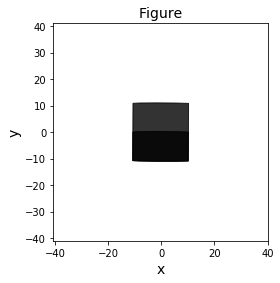

In [11]:
viewer.draw(neuron.soma, plane='xy')

And something for the adventurous.
To work with subplots and create more complex plots, we need to use lower level plot functions that reside in the view module

In [12]:
from neurom.view import view
from neurom.view.common import update_plot_limits

def plot_neurites(neuron, plot_name):
    neurites = neuron.neurites

    N = len(neurites)

    # create N subplots, one for each neurite
    f, axes = plt.subplots(1, N, figsize=(15, 3)) # figsize in inches (width, height)

    for i, neurite in enumerate(neurites):
        current_axes = axes[i]

        # draw the neurite in the i-th subplot
        # new_fig set to False will prevent the creation of a new figure
        # every time the function is called. The one that we created above will be used instead
        view.plot_tree(current_axes, neurite, plane='xy')
        update_plot_limits(current_axes, white_space=10)
        # remove the xy axes for a prettier result
        current_axes.axis('off')

        # remove the title for each subplot
        current_axes.set_title('')

    # set a global title for the figure
    f.suptitle(neuron.name, fontsize=30)
    f.savefig(plot_path, dpi=300)



# 3. Extract basic morphometrics (features)

There are two types of features, the neuron and neurite features.

Neurite features can be extracted from a single neurite, a list of neurites or a neuron.

Neuron features can only be extracted from a neuron, because some additional info is ussuale required (e.g. distance from soma).

All features can be called through the neurom.get function

In [13]:
help(nm.get)

Help on function get in module neurom.fst:

get(feature, obj, **kwargs)
    Obtain a feature from a set of morphology objects
    
    Parameters:
        feature(string): feature to extract
        obj: a neuron, population or neurite tree
        **kwargs: parameters to forward to underlying worker functions
    
    Returns:
        features as a 1D or 2D numpy array.
    
        
    Features:        
        Neurite features (neurite, neuron, neuron population):
            - local_bifurcation_angles:
                Get a list of local bifurcation angles in a collection of neurites
            - neurite_lengths:
                Get the path length per neurite in a collection
            - neurite_volume_density:
                Get the volume density per neurite
                
                    The volume density is defined as the ratio of the neurite volume and
                    the volume of the neurite's enclosing convex hull
            - neurite_volumes:
             

In [14]:
# extract section_lengths
section_lengths_neuron = nm.get('section_lengths', neuron)
print "Section lengths: \n", section_lengths_neuron[:10]

# Extract the local bifurcation angles
local_bif_angles = nm.get('local_bifurcation_angles', neuron)
print "Section local bifurcation angles: \n", local_bif_angles[:10]

Section lengths: 
[ 55.06955636  20.10034906 110.75055676 100.39528448  85.04323
   1.44530274  18.68733127  43.61434798  76.34868589  95.39227852]
Section local bifurcation angles: 
[0.30130371 0.11050602 0.41107697 0.67414022 0.41241106 1.06433565
 0.19632288 0.65909688 0.54600279 0.00487776]


In [15]:
try:
    # this must err because no soma is available
    nm.get('soma_radii', neuron.neurites)

except AttributeError:
    
    print "Soma was not found. Input object is wrong."


Soma was not found. Input object is wrong.


## Select Neurite Types

The previous examples treated all neurites in the same way. NeuroM allows you to extract morphometrics for a selected type of trees.

In [16]:
dir(nm.NeuriteType)

['__class__',
 '__doc__',
 '__members__',
 '__module__',
 'all',
 'apical_dendrite',
 'axon',
 'basal_dendrite',
 'soma',
 'undefined']

In [17]:
# Extract the section lengths of axonal trees
ax_section_lengths = nm.get('section_lengths', neuron, neurite_type=nm.NeuriteType.axon)

# Extract the section lengths of basal dendrite trees
ba_section_lengths = nm.get('section_lengths', neuron, neurite_type=nm.NeuriteType.basal_dendrite)

# Extract the section lengths of apical dendrite trees
ap_section_lengths = nm.get('section_lengths', neuron, neurite_type=nm.NeuriteType.apical_dendrite)

print '\naxonal ', ax_section_lengths
print '\nbasal  ', ba_section_lengths
print '\napical ', ap_section_lengths


axonal  [114.95684761 118.48479677 132.67603892 193.21721096 113.81742121
  47.59209074  65.36185785  44.95308688 373.23604641  15.75312097
  56.12119607 136.91988366  49.13525949  35.30789773  34.33675724
  24.83860197  28.85139722 187.29470046   9.6303254    2.80025646
  89.46182249 145.81638699 147.63992827  14.85149339  96.36181044
 530.66261951  46.19311916  93.7627716  102.89979036  84.83208129
  65.77039744  10.16963396  12.93778673 265.27820384  47.65926597
  77.64567012  24.4466782   28.39232687 488.57588577 276.46794921
  45.4862182  225.24548351  92.29736426 378.7789511   11.77248536
  47.64029623  10.00024033 105.0468807   87.87875499  69.16394066
 166.27851445  63.22156945 354.60182178 467.04062444  11.14428365
  51.25763303  61.29787928 187.99326865 327.93655482  77.2765683
  30.90067291  35.03835012  41.07939636 146.76449817 114.13015093
  20.54503348  91.1416828   41.59736497 262.88141914 149.02936673
  92.36103888 214.15678005  49.16069792 100.70046351   8.43210157
  

## Let's plot the morphometrics

/Users/utanashati/miniconda3/envs/silico/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10b5c1f50>)

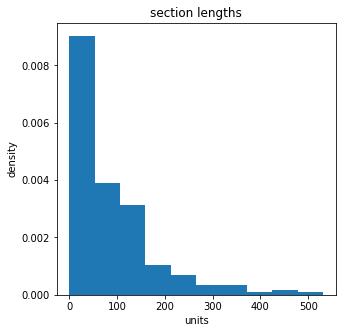

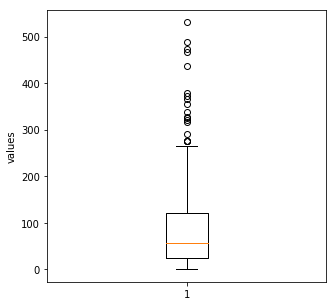

In [18]:
def histogram(values):
    """Generates a histogram in a new figure"""
    
    # create an image with one subplot
    f, ax = plt.subplots(1,1, figsize=(5,5))
    
    # create a histogram with specified bins and normalized
    ax.hist(values, bins=10, normed=True)
    
    ax.set_title(feature.replace('_', ' ')) # replace the underscores with spaces in the string
    
    ax.set_xlabel('units')
    ax.set_ylabel('density')
    
    return f, ax

def boxplot(data):
    '''Generates a boxplot in a new figure'''

    # create an image with one subplot
    f, ax = plt.subplots(1,1, figsize=(5,5))

    ax.boxplot(data) # plot boxplot
    
    ax.set_ylabel('values')

    return f, ax

feature =  'section_lengths'
values = nm.get(feature, neuron)

histogram(values)
boxplot(values)

# 4. Check Morphologies for errors

In [19]:
# the structural checks concern the valid structure of a morphology
# the neuron_checks are more specific to simulation
# options set the tolerance parameters for the checks

config = {
    'checks': {
        'structural_checks': [
            'is_single_tree',
            'has_valid_soma',
            'has_soma_points',
            'has_sequential_ids',
            'has_increasing_ids',
            'has_valid_neurites',
            'no_missing_parents',
            'has_all_finite_radius_neurites'
        ],
        'neuron_checks': [
            'has_axon',
            'has_basal_dendrite',
            'has_apical_dendrite',
            'has_no_jumps',
            'has_no_fat_ends',
            'has_nonzero_soma_radius',
            'has_all_nonzero_neurite_radii',
            'has_all_nonzero_section_lengths',
            'has_all_nonzero_segment_lengths',
        ]
    },
    'options': {
        'has_nonzero_soma_radius': 0.0,
        "has_all_nonzero_neurite_radii": 0.007,
        "has_all_nonzero_segment_lengths": 0.01,
        "has_all_nonzero_section_lengths": 0.01,
    }
}

In [20]:
from neurom.check.runner import CheckRunner

def check_neuron(config, path_to_neuron, f):
    # create a CheckRunner object by providing the configuration dict
    check_runner = CheckRunner(config)

    # run on a directory or a morphology
    results = check_runner.run(path_to_neuron)

    for morph in results['files']:

#        print "Morphology: {} \n".format(morph)
        f.write("Morphology: {} \n".format(morph))

        checks_dict = results['files'][morph]

        # empty strings for our results
        passed = ""
        failed = ""
        return_ = True

        # iterate over dictionary's items
        for check_name, status in checks_dict.items():

            # the string with the check's name and status
            string = "\t{0: <50} : {1}\n".format(check_name, status)

            # separate passed from failed checks
            if status is True:

                passed += string # concatenates to the current passed string

            else:

                failed += string # concatenats to the current failed string
                return_ = False

#        print passed
        f.write(passed)
#        print failed
        f.write(failed)
    return return_

In [22]:
#check_neuron(config, path_to_neuron)

___
__Exercise:__ Work with the other morphology files that you have uploaded to the collab Storage, <br> 
some of them are good and some of them have errors.<br>
Find the files with errors and enumerate the errors in each file. Try to plot them and look at the morphology errors.
___

In [32]:
!ls data/neurones

C030397A-P3.asc     Fluo55_low.asc      rp080520-1C_P7.asc  vd110611_idA.asc
C040896A-P3.asc     exampleCell.CNG.swc rp080520-1C_P9.asc  vd110617_idA.asc
C060114A4.asc       rp080520-1C_P3.asc  vd110518_idA.asc


In [33]:
import os

In [36]:
file_paths = os.listdir('data/neurons/')

In [41]:
print file_paths

['rp080520-1C_P7.asc', 'C040896A-P3.asc', 'exampleCell.CNG.swc', 'C060114A4.asc', 'vd110611_idA.asc', 'rp080520-1C_P3.asc', 'vd110617_idA.asc', 'vd110518_idA.asc', 'rp080520-1C_P9.asc', 'C030397A-P3.asc', 'Fluo55_low.asc']


In [37]:
valid_paths = []
with open('data/log.txt', 'w') as f:
    for path in file_paths:
        path = 'data/neurons/' + path
        status = check_neuron(config, path, f)
        if status != False:
            valid_paths.append(path)

In [38]:
for path in valid_paths[1:]:
    print path

data/neurons/vd110611_idA.asc
data/neurons/vd110617_idA.asc
data/neurons/Fluo55_low.asc


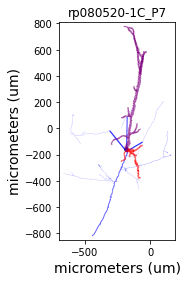

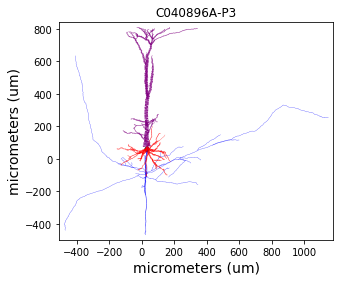

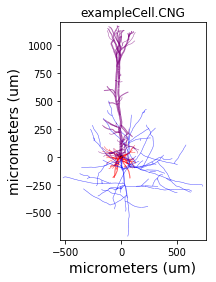

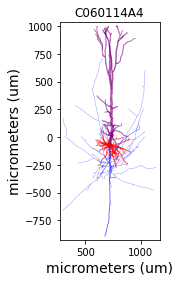

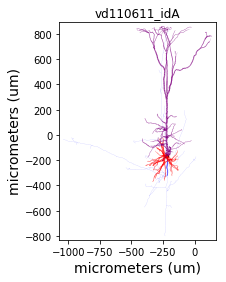

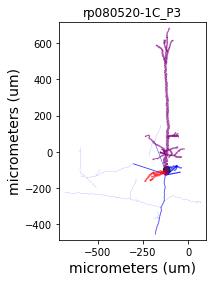

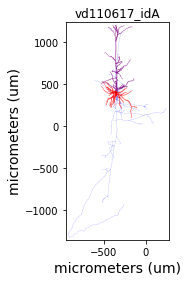

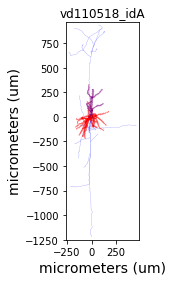

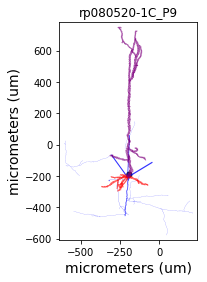

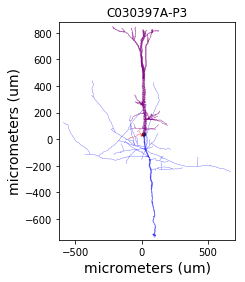

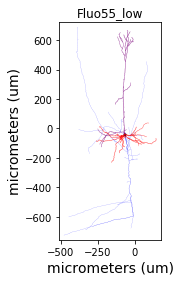

In [42]:
for path in file_paths:
    path = 'data/neurons/' + path
    plot_path = 'data/plots/' + path[12:-3] + 'png'
    neuron = nm.load_neuron(path)
    plot_neuron(neuron, plot_path)

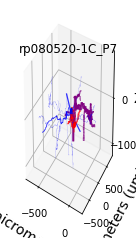

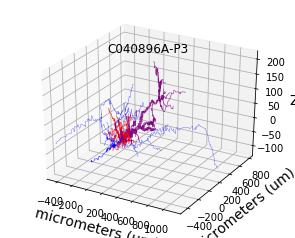

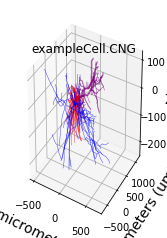

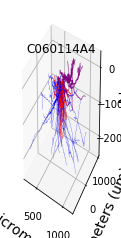

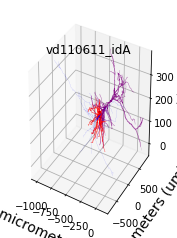

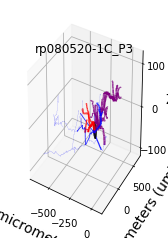

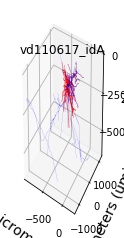

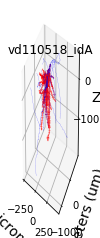

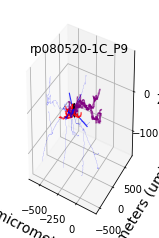

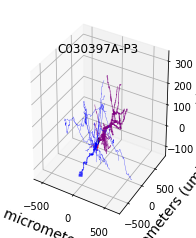

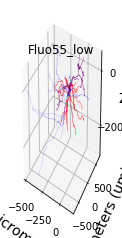

In [44]:
for path in file_paths:
    path = 'data/neurons/' + path
    plot_path = 'data/plots/' + path[12:-4] + '_3d.png'
    neuron = nm.load_neuron(path)
    plot_neuron_3d(neuron, plot_path)

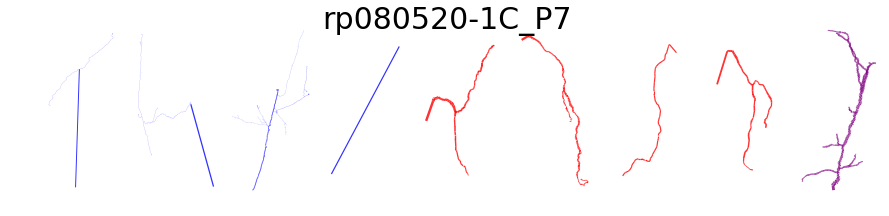

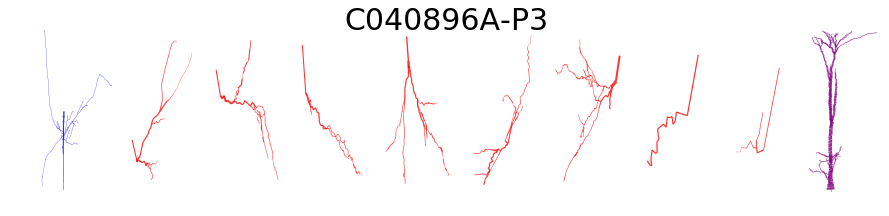

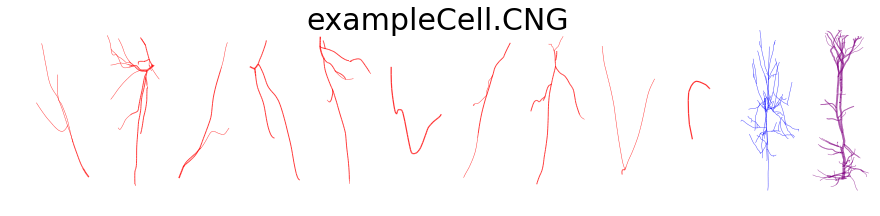

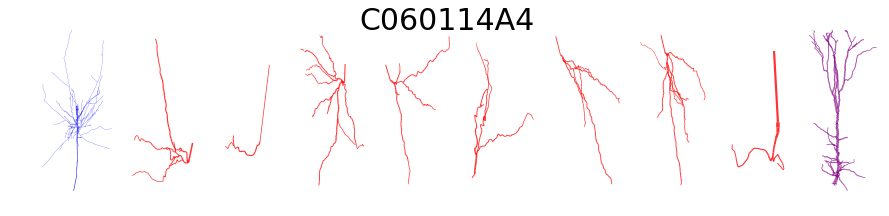

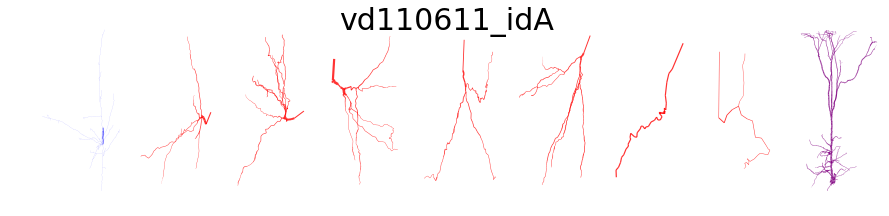

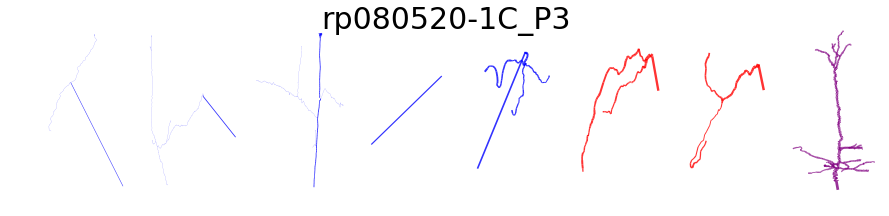

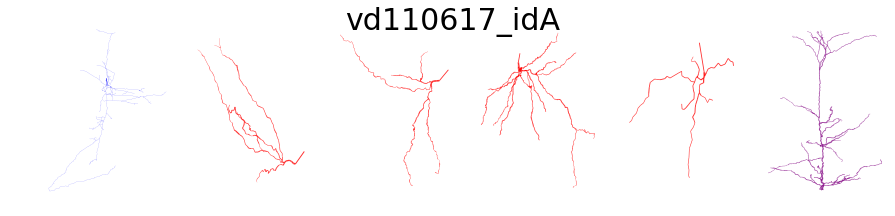

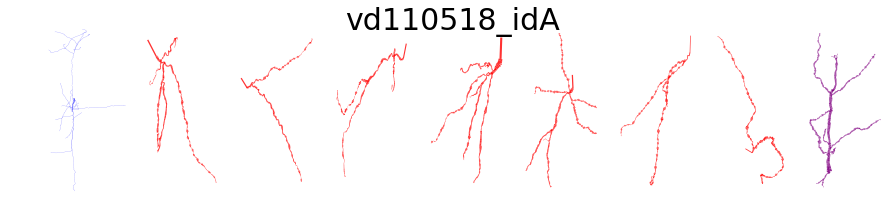

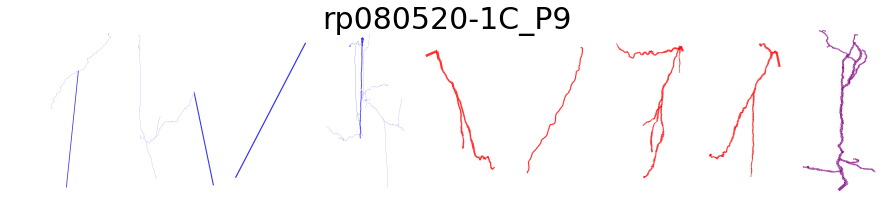

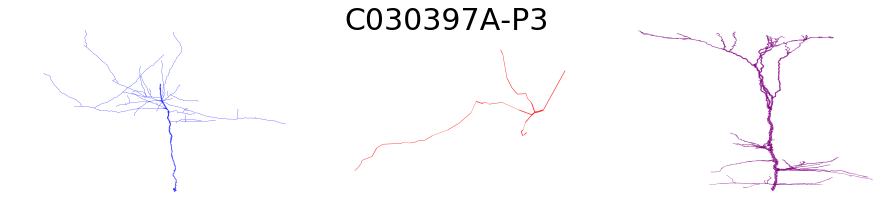

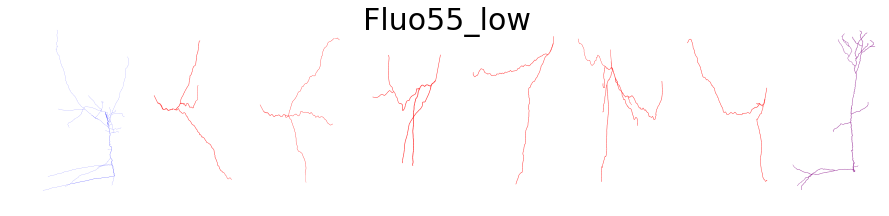

In [45]:
for path in file_paths:
    path = 'data/neurons/' + path
    plot_path = 'data/plots/' + path[12:-4] + '_neurites.png'
    neuron = nm.load_neuron(path)
    plot_neurites(neuron, plot_path)

In [57]:
valid_paths[1]

'data/vd110611_idA.asc'

**NB:** All the valid cells belong to Neocortex Late bifurcating Thick Tufted Pyramidal Cell, Somatosensory cortex hindlimb layer V.

## Result

Soo, we choose neuron *vd110611_idA.asc*.